In [1]:
%load_ext autoreload
%autoreload 2
from Project import Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from typing import Tuple

import os

In [4]:
def stimulus(f : [float], phi : [float], length : int, k = 60) -> np.array:
    return np.array([0.5*( 1 + np.sin(2*np.pi*f*(i/k) + phi) ) for i in range(length)])

## BETA Dataset

Sample function : $$ s(f, \Phi, i) = \dfrac{\sin{[2\pi f (i/\text{RefreshRate}) + \Phi]}}{2} $$

where $\text{RefreshRate} = 60 Hz$ and the indexed frequency and phase values can be obtained by

$$ f_k = f_0 + (k-1)\cdot \Delta f \\ \Phi_k = \Phi_0 + (k - 1)\cdot \Delta \Phi$$

for $f_0 = 8 Hz, \Phi_0 = 0$ and $\Delta f = 0.2 Hz, \Delta \Phi = 0.5 \cdot \pi$

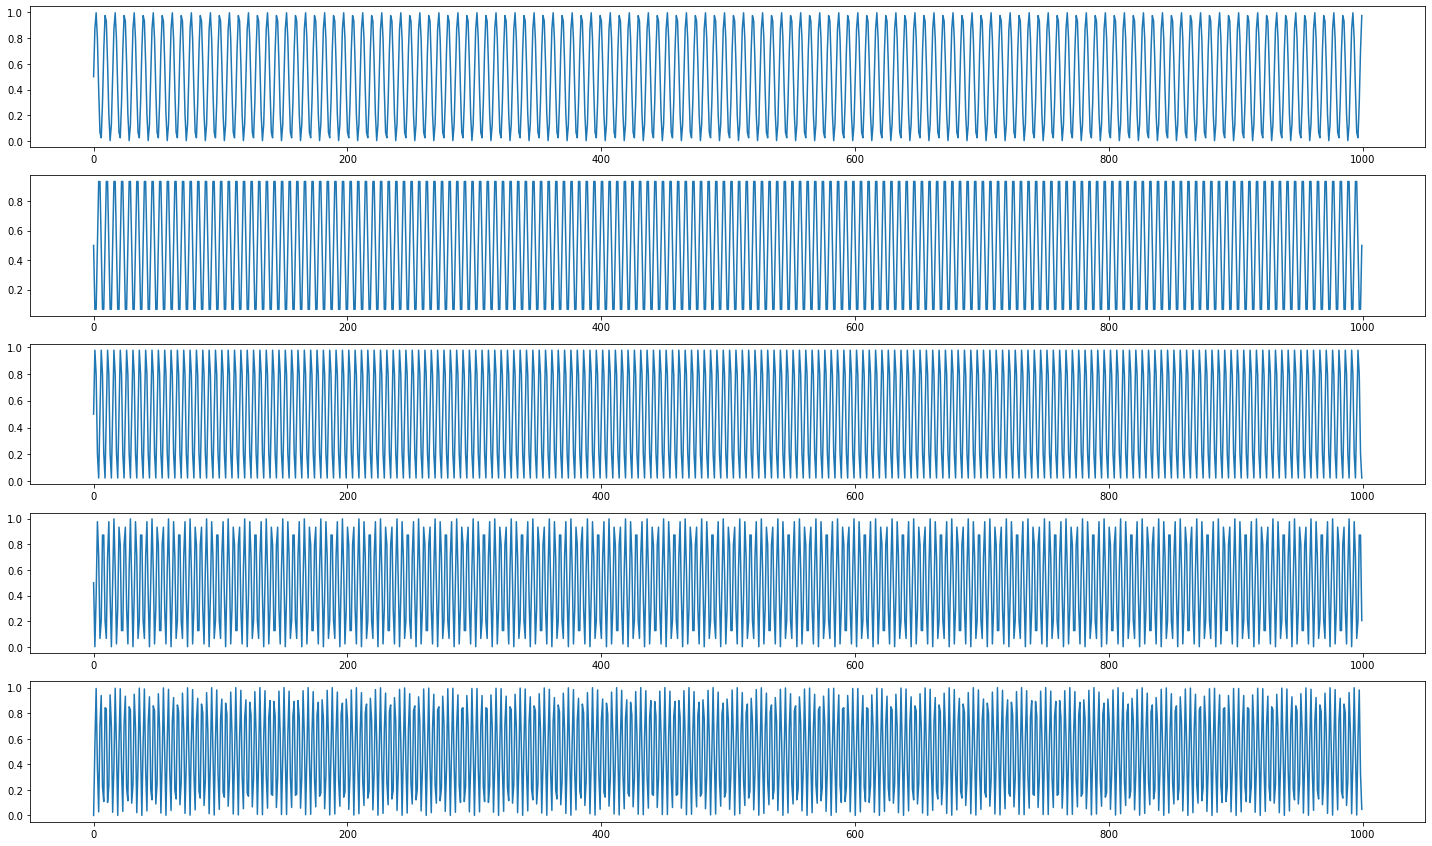

In [7]:
# frequency = np.array([ 8.6,  8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6,10.8, 11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. , 13.2, 13.4, 13.6, 13.8, 14. ,
#                       14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.4, 15.6, 15.8,  8. ,  8.2,  8.4])
# phases = np.array([0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 
#                    3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 
#                    0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898])

frequency = np.array([8 + (k - 1)*0.2 for k in range(1, 40 + 1)])
phases    = np.array([0 + (k - 1)*0.5*np.pi for k in range(1, 40 + 1)])

signal_length = 1000
stimulus_matrix = np.array([stimulus(f, phi, signal_length) for f, phi in zip(frequency, phases)]) # This will be used later after i parsed the information of each subject
# stimulus_matrix = np.array([stimulus(f_k(k), phi_k(k), signal_length) for k in range(1, 40 + 1)])

fig, ax = plt.subplots(nrows = 5, ncols = 1)
fig.set_size_inches(25, 15)

ax[0].plot(range(signal_length), stimulus_matrix[0])
ax[1].plot(range(signal_length), stimulus_matrix[10])
ax[2].plot(range(signal_length), stimulus_matrix[20])
ax[3].plot(range(signal_length), stimulus_matrix[30])
ax[4].plot(range(signal_length), stimulus_matrix[39])

In [22]:
# Cutting Series

# path = Project.tsinghua_raw_dir / 'beta' / 'separated'
# for t in range(1, 40 + 1):
# # for t in [1]:
#     files = os.listdir(path / str(t))
#     for file in files:
#         X = np.loadtxt((path / str(t) / file).__str__())
#         file_identifier = file[:-4]
#         if X.shape[0] == 1000:
#             X1 = X[:500, :]
#             X2 = X[500:, :]
#         else:
#             X1 = X[:500, :]
#             X2 = X[250:, :]
#         np.savetxt(path / str(t) / (file_identifier + "_1.csv"), X1)
#         np.savetxt(path / str(t) / (file_identifier + "_2.csv"), X2)
#         os.remove(path / str(t) / file)

In [60]:
# Functions used to handle the .mat original files

# def saveSeparatedFiles():
#     files = [file for file in os.listdir(Project.tsinghua_raw_dir / 'beta') if "mat" in file]
#     for s in range(len(files)):
#         path  = Project.tsinghua_raw_dir / 'beta' / files[s]
#         data, subject_info = getData(path)
#         for b in range(4):
#             for t in range(40):
#                 X = data[:, :, b, t].T
#                 output_directory = Project.tsinghua_raw_dir / 'beta' / 'separated' / str()
#                 np.savetxt(Project.tsinghua_raw_dir / 'beta' / 'separated' / str(t+1) / "S{}_{}.csv".format(s+1, b+1), X)
                
# def getData(path):
#     subject = scipy.io.loadmat(path)['data'][0][0]
#     return subject[0], subjectInfo(subject)
                
# class subjectInfo():
#     def __init__(self, subject):
#         self.data = [x for x in subject[1][0][0]]
        
#     def getID(self):
#         return self.data[0].item()
    
#     def getAge(self):
#         return self.data[1].item()
        
#     def getGender(self):
#         return self.data[2].item()
        
#     def getElectrodes(self):
#         electrodes_id = list(range(1, 65))
#         data = pd.DataFrame(index = list(range(1, 65)), columns = ['Name', 'x', 'y'])
#         for i in range(64):
#             d = self.data[3][i][1].astype(np.float64).item()
#             r = self.data[3][i][2].astype(np.float64).item()
#             name = self.data[3][i][3].item()
#             data.loc[i+1] = [name, x, y]
            
#         return data
        
#     def getFrequencies(self):
#         return self.data[4][0]
    
#     def getPhases(self):
#         return self.data[5][0]
    
#     def getVal1(self):
#         return self.data[6][0]
        
#     def getVal2(self):
#         return self.data[7][0]
        
#     def getVal3(self):
#         return self.data[8][0]
        
#     def getSamplingRate(self):
#         return self.data[9][0]

In [28]:
# saveSeparatedFiles()

In [3]:
path  = Project.tsinghua_raw_dir / 'beta' / 'separated' / '1'
files = os.listdir(path)

In [4]:
data = np.loadtxt(path / files[1])
print(data.shape)

(500, 64)


### CCA

In [38]:
# %**************************************************************************
# %   Canonical Correlation Analysis
# %**************************************************************************
# function[canonCorrVectors, canonCorrCoefficients] = ...
#     canonCorrAnalysis(functionMatrix, dataMatrix)
# %--------------------------------------------------------------------------
# %
# %--------------------------------------------------------------------------
# numOfAttributes = size(functionMatrix, 2);
# ccaMatrix = cat(2, functionMatrix, dataMatrix);
# covMatrix = cov(ccaMatrix);
# covXX = covMatrix(1:numOfAttributes, 1:numOfAttributes);
# covYY = covMatrix(numOfAttributes + 1:end, numOfAttributes + 1:end);
# covXY = covMatrix(1:numOfAttributes, numOfAttributes + 1:end);
# invCovXX = covXX^(-1/2);
# invCovYY = covYY^(-1/2);
# Rn = invCovXX*covXY*invCovYY;
# [~, eigValues, eigVectorsYY] = svd(Rn);
# canonCorrCoefficients = diag(eigValues);
# canonCorrVectors = invCovYY*eigVectorsYY;
# %--------------------------------------------------------------------------
# end
# %**************************************************************************

def matrixPower(A: np.ndarray, x: np.float) -> np.array:
    eigvalues, V = np.linalg.eig(np.linalg.inv(A))
    D = np.diag(eigvalues)
    return V*(D**(x))*V.T

# class CanonicalCorrelationAnalysis():
#     def __init__(self):
#         self.X = None
#         self.Y = None
        
def canonicalCorrelation(X: np.ndarray, Y: np.ndarray, num_attributes: int = None):
#         self.num_attributes = min(X.shape[0], Y.shape[0]) 
    XY = np.concatenate((X, Y))
    covMatrix = np.cov(XY)
    covXX = covMatrix[:X.shape[0], :X.shape[0]]
    covYY = covMatrix[X.shape[0]:, X.shape[0]:]
    covXY = covMatrix[X.shape[0]:, :X.shape[0]]
    invCovXX = matrixPower(covXX, 0.5)
    invCovYY = matrixPower(covYY, 0.5)
    Rn = np.dot(invCovXX, np.dot(covXY, invCovYY))
    _, values, vectors = np.linalg.svd(Rn)
    canonCorrelationsCoefficients = np.diag(values)
    canonCorrelationVectors = np.dot(invCovYY, vectors)

    return canonCorrelationsCoefficients, canonCorrelationVectors

def correlationMatrices(X: np.ndarray, Y: np.ndarray) -> Tuple[np.ndarray]:
    XY = np.concatenate((X, Y))
    covMatrix = np.cov(XY)
    covXX = covMatrix[:X.shape[0], :X.shape[0]]
    covYY = covMatrix[X.shape[0]:, X.shape[0]:]
    covXY = covMatrix[:X.shape[0], X.shape[0]:]
    covYX = covMatrix[X.shape[0]:, :X.shape[0]]
    
    return covXX, covYY, covXY, covYX 

# def CanonicalCorrelationAnalysis(X: np.ndarray, Y: np.ndarray) -> Tuple[np.ndarray]:
#     covXX, covYY, covXY, covYX = correlationMatrices(X, Y)
#     invCovYY = np.linalg.inv(covYY)

#     Rxx = np.linalg.cholesky(covXX)
#     print("Rxx: {}".format(Rxx))
#     invRxx = np.linalg.inv(Rxx)
#     print("invRxx: {}".format(invRxx))
#     A = invRxx.dot(covXY.dot(invCovYY.dot(covYX.dot(invRxx.T))))
#     print("A: {}".format(A))

#     eigenvalues, ux = np.linalg.eig(A)
#     eigenvalues = np.power(eigenvalues, 2)
#     print("Eig: {}".format(np.diag(eigenvalues)))
#     wx = np.linalg.inv(Rxx.T).dot(ux)
# #     wy = np.linalg.inv(covYY).dot(covYX.dot(wx))/eigenvalues # broadcasted along column vectors
#     wy = np.linalg.inv(covYY).dot(covYX.dot(wx))
    
#     return wx, wy, eigenvalues
# #     return np.real(wx), np.real(wy), np.real(eigenvalues)
        

In [6]:
frequency = np.array([ 8.6,  8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6,10.8, 11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. , 13.2, 13.4, 13.6, 13.8, 14. ,
                      14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.4, 15.6, 15.8,  8. ,  8.2,  8.4])
phases = np.array([0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 
                   3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 
                   0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898, 0.        , 1.57079633, 3.14159265, 4.71238898])

In [44]:
covXX, covYY, covXY, covYX = correlationMatrices(X, Y)
invCovXX = matrixPower(covXX, 0.5)
invCovYY = matrixPower(covYY, 0.5)
Rn = np.dot(invCovXX, np.dot(covXY, invCovYY))
_, values, vectors = np.linalg.svd(Rn)
canonCorrelationsCoefficients = np.diag(values)
canonCorrelationVectors = np.dot(invCovYY, vectors)

In [45]:
canonCorrelationVectors

array([[-4.58383452e-21-6.25295093e-09j,  0.00000000e+00-1.57206134e-07j,
        -5.72979315e-22-4.05882401e-08j, ...,
        -1.23101025e-23-1.65988985e-06j, -1.67865034e-24-7.00633581e-07j,
         6.15505124e-24-6.49182605e-07j],
       [ 5.90663069e-19-1.91176977e-07j, -1.26570658e-19-4.13141526e-06j,
         2.53141315e-19-9.07670353e-07j, ...,
        -6.59222175e-22-5.02178745e-05j,  7.00423561e-22-2.23955731e-05j,
         5.35618017e-22-2.04346668e-05j],
       [ 1.74750218e-19-1.37151739e-08j, -3.74464753e-20-3.53513723e-07j,
        -2.49643169e-20-5.98421188e-08j, ...,
         2.92956909e-21-1.74985233e-05j,  9.87358235e-22-8.00403153e-06j,
         1.01884806e-21-6.21536569e-06j],
       ...,
       [ 8.11282536e-05-6.14563963e-05j,  3.10304197e-04+9.01047778e-05j,
         8.63590440e-04-3.77357777e-04j, ...,
         1.38707535e-04+1.31330553e-04j,  4.47944874e-06-9.67014309e-05j,
        -1.46182675e-04-3.90690838e-05j],
       [ 3.60426299e-05-2.72423298e-04j,  2.

In [35]:
print(covXX.shape, covYY.shape, covXY.shape, invCovXX.shape, invCovYY.shape)

(64, 64) (40, 40) (40, 64) (64, 64) (40, 40)


In [43]:
Y = data.T
signal_length = Y.shape[1]
X = np.array([stimulus(f, phi, signal_length) for f, phi in zip(frequency, phases)])
print("X: {}".format(X))
print("Y: {}".format(Y))

X: [[5.00000000e-01 6.07231290e-01 7.09472509e-01 ... 7.85700646e-01
  8.67054611e-01 9.31327473e-01]
 [1.00000000e+00 9.87820932e-01 9.51877047e-01 ... 3.09478807e-04
  8.62245604e-03 4.08735148e-02]
 [5.00000002e-01 3.87864621e-01 2.81442118e-01 ... 8.13845682e-01
  7.18557885e-01 6.12135382e-01]
 ...
 [1.00000000e+00 9.89927526e-01 9.60115923e-01 ... 9.11766300e-01
  9.60115924e-01 9.89927527e-01]
 [5.00000002e-01 3.97683639e-01 2.99697545e-01 ... 2.60490333e-02
  6.86725257e-02 1.29550809e-01]
 [0.00000000e+00 1.11010657e-02 4.39113283e-02 ... 6.56896801e-01
  5.53930273e-01 4.48569010e-01]]
Y: [[  5.42141584   4.80678838   6.29633923 ...  -8.53885039  -5.29123308
   -3.40976649]
 [  7.10896824   7.06107987   9.7581672  ... -10.07706238  -8.45300127
   -5.88511272]
 [  6.23794446   3.59612685   6.15968809 ... -11.75213946 -11.31191698
   -8.78532526]
 ...
 [ 11.94562076   7.33901179   6.68467665 ...   1.90708492   2.92278018
    2.56743404]
 [ 14.95410322   8.68737467   3.70954445 

In [31]:
canonCorrelationsCoefficients, canonCorrelationVectors = canonicalCorrelation(X, Y)

ValueError: shapes (40,64) and (40,40) not aligned: 64 (dim 1) != 40 (dim 0)

In [23]:
wx, wy, eig = CanonicalCorrelationAnalysis(X, Y)
Xc = wx.dot(X)
Yc = wy.T.dot(Y)

Rxx: [[ 4.97255603  0.          0.         ...  0.          0.
   0.        ]
 [ 3.78657867  2.41449161  0.         ...  0.          0.
   0.        ]
 [ 3.42588382  2.24243481  2.17538486 ...  0.          0.
   0.        ]
 ...
 [ 0.95384057  0.45089916 -0.25301782 ...  1.7620504   0.
   0.        ]
 [ 0.85654105  0.49691737 -0.03712465 ...  0.89234223  0.97164695
   0.        ]
 [ 1.57850682  0.60417333 -0.15244181 ...  0.57687309  1.15612967
   1.53952062]]
invRxx: [[ 2.01103817e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.15385409e-01  4.14165862e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.39984949e-03 -4.26931327e-01  4.59688774e-01 ... -2.15599591e-33
   2.40255311e-34  1.02395334e-33]
 ...
 [-8.54660518e-03  9.03199985e-02 -6.33926958e-02 ...  5.67520657e-01
  -4.27687417e-17  1.08596546e-16]
 [-3.75117827e-02  5.67235049e-02  7.00363162e-02 ... -5.21200265e-01
   1.02918040e+00 -2.62984549e-1

In [13]:
print("Wx: {}".format(wx))
print("Wy: {}".format(wy))

[[-0.01475625+0.0007965j  -0.01475625-0.0007965j   0.03603435-0.00371789j
  ...  0.04974858+0.01080626j  0.04974858-0.01080626j
  -0.00681477+0.j        ]
 [-0.10226397+0.00546643j -0.10226397-0.00546643j  0.04456073+0.00506655j
  ...  0.02216058-0.04722678j  0.02216058+0.04722678j
   0.14656117+0.j        ]
 [ 0.05716336+0.00976609j  0.05716336-0.00976609j -0.0667064 -0.00786818j
  ... -0.04353932-0.04983741j -0.04353932+0.04983741j
  -0.0071733 +0.j        ]
 ...
 [ 0.00078249+0.00052418j  0.00078249-0.00052418j  0.02560544-0.01613892j
  ...  0.11008334-0.07807503j  0.11008334+0.07807503j
   0.04932973+0.j        ]
 [-0.0366666 +0.00692108j -0.0366666 -0.00692108j -0.0615903 -0.00353573j
  ... -0.14910853+0.10432894j -0.14910853-0.10432894j
  -0.07301207+0.j        ]
 [-0.0279301 -0.00994172j -0.0279301 +0.00994172j  0.06595265-0.00777757j
  ...  0.01069018-0.02220363j  0.01069018+0.02220363j
   0.00900742+0.j        ]] [[-1.31625212e+05-3.22027258e+04j -1.31625212e+05+3.22027258e+04

In [358]:
_, _, covXY, _ = correlationMatrices(X, Y)
_, _, covXcYc, _ = correlationMatrices(Xc, Yc)

In [359]:
eig

array([ 1.61450228e+00,  1.61450228e+00,  4.87172460e-01,  4.87172460e-01,
        6.46827547e-01,  6.46827547e-01,  6.18886600e-01,  3.81980416e-01,
        3.50331443e-01,  3.50331443e-01,  1.35947663e-02,  2.69991172e-01,
        1.92764910e-01,  1.92764910e-01,  2.34285019e-01,  1.70201747e-01,
        1.70201747e-01,  1.70614193e-01,  6.28471467e-02,  6.28471467e-02,
        1.13126523e-01,  8.13330766e-02,  8.13330766e-02,  5.38957647e-02,
        4.07685241e-02,  4.07685241e-02,  1.58337421e-02,  1.58337421e-02,
        1.78570563e-02,  1.78570563e-02,  1.10282686e-02, -2.85268150e-04,
       -2.85268150e-04,  2.65004480e-03,  2.65004480e-03,  5.51157986e-04,
        1.03261287e-04,  1.09022263e-05,  4.30908999e-06,  4.30908999e-06,
        4.08567619e-16,  4.08567619e-16,  1.79048761e-16,  1.79048761e-16,
        4.16653591e-17,  4.16653591e-17, -6.81920889e-18, -6.81920889e-18,
        5.22168719e-17, -3.41148894e-17, -3.41148894e-17,  1.29376783e-17,
        1.29376783e-17, -

In [365]:
np.flip(np.sort(eig))

array([ 1.61450228e+00,  1.61450228e+00,  6.46827547e-01,  6.46827547e-01,
        6.18886600e-01,  4.87172460e-01,  4.87172460e-01,  3.81980416e-01,
        3.50331443e-01,  3.50331443e-01,  2.69991172e-01,  2.34285019e-01,
        1.92764910e-01,  1.92764910e-01,  1.70614193e-01,  1.70201747e-01,
        1.70201747e-01,  1.13126523e-01,  8.13330766e-02,  8.13330766e-02,
        6.28471467e-02,  6.28471467e-02,  5.38957647e-02,  4.07685241e-02,
        4.07685241e-02,  1.78570563e-02,  1.78570563e-02,  1.58337421e-02,
        1.58337421e-02,  1.35947663e-02,  1.10282686e-02,  2.65004480e-03,
        2.65004480e-03,  5.51157986e-04,  1.03261287e-04,  1.09022263e-05,
        4.30908999e-06,  4.30908999e-06,  4.08567619e-16,  4.08567619e-16,
        1.79048761e-16,  1.79048761e-16,  5.22168719e-17,  4.16653591e-17,
        4.16653591e-17,  1.29376783e-17,  1.29376783e-17,  5.22970178e-18,
        2.44441196e-18,  2.44441196e-18,  2.01499226e-18,  1.39569098e-18,
       -2.32128893e-19, -

In [354]:
j = 3
print(covXY[j])
print(covXcYc[j])

[-0.01433074  0.0718353   0.07367508 -0.21725328  0.15494056 -0.01860804
 -0.00518418  0.01951869 -0.16288351  0.26100278 -0.10044398 -0.14693858
  0.16017997  0.02004915 -0.10984262  0.09215625 -0.18868348  0.38084765
 -0.38922652  0.15560916  0.04449355 -0.04457842 -0.00128187 -0.04949914
  0.09319822 -0.01663373 -0.07931821  0.051137    0.0629246  -0.12399735
  0.08473726 -0.00791181 -0.02981321  0.00747234  0.01430088  0.04645175
 -0.15322554  0.02582495  0.08242907 -0.10874782]
[-1.54543300e+00 -1.54543300e+00  3.49089007e-01  3.49089007e-01
 -7.78080170e-01 -7.78080170e-01  8.03468962e-01  2.80795491e-01
  4.73615230e-01  4.73615230e-01 -2.80944882e-02  5.60280329e-01
  1.10945671e-01  1.10945671e-01  4.93658008e-01 -2.36490254e-01
 -2.36490254e-01  1.72772145e-01 -2.12492913e-01 -2.12492913e-01
 -1.63414819e-01  6.73583598e-02  6.73583598e-02  2.19822816e-01
  9.06069215e-02  9.06069215e-02 -4.77928743e-02 -4.77928743e-02
 -2.03591898e-02 -2.03591898e-02 -1.09285385e-03 -2.75242

In [213]:
X = np.random.randn(4, 50)
Y = np.random.randn(6, 50)
XY = np.concatenate((X, Y))

covMatrix = np.cov(XY)
covXX = covMatrix[:X.shape[0], :X.shape[0]]
covYY = covMatrix[X.shape[0]:, X.shape[0]:]
covXY = covMatrix[:X.shape[0], X.shape[0]:]
covYX = covMatrix[X.shape[0]:, :X.shape[0]]
invCovYY = np.linalg.inv(covYY)

Rxx = np.linalg.cholesky(covXX)
invRxx = np.linalg.inv(Rxx)
A = invRxx.dot(covXY.dot(invCovYY.dot(covYX.dot(invRxx.T))))

eigenvalues, ux = np.linalg.eig(A)
eigenvalues = np.power(eigenvalues, 2)
wx = np.linalg.inv(Rxx.T).dot(ux)
wy = np.linalg.inv(covYY).dot(covYX.dot(wx))/eigenvalues # broadcasted along column vectors

In [211]:
X_c = wx.dot(X)
Y_c = wy.T.dot(Y)
XcYc = np.concatenate((X_c, Y_c))
covMatrix = np.cov(XcYc)
covXcYc   = covMatrix[:X_c.shape[0], X_c.shape[0]:]
print(covXcYc)

[[ -3.31971559  -0.71005943  10.38376459  25.91335927]
 [ -1.41797749   1.18086942   9.34318703 -38.90713197]
 [ -4.68213736  -1.52503776 -11.06351167 -18.98938651]
 [ -2.3960329    5.15236156  -1.84905944  -9.50457459]]


In [209]:
print(covXY)

[[-0.16914695  0.03174809  0.03054286 -0.2270378  -0.0607592   0.03030373]
 [-0.37809648 -0.09747603 -0.02559078  0.01834856 -0.0521545   0.02186736]
 [ 0.11962648  0.05016802 -0.09459682  0.0531862   0.27985335  0.01798557]
 [-0.09769888  0.0111511   0.01029843  0.0988471   0.20344289 -0.17064505]]


In [54]:
from sklearn.cross_decomposition import CCA

In [55]:
from numpy.linalg import pinv

In [8]:
k = 250
def stimulus(f : [float], phi : [float], length : int) -> np.array:
    return np.array([0.5*( 1 + np.sin(2*np.pi*f*(i/k) + phi) ) for i in range(length)])
#     return np.array([[0.5*( 1 + np.sin(2*np.pi*f*(i/k) + phi) ) for i in range(length)],
#                      [0.5*( 1 + np.cos(2*np.pi*f*(i/k) + phi) ) for i in range(length)],
#                      [0.5*( 1 + np.sin(4*np.pi*f*(i/k) + phi) ) for i in range(length)],
#                      [0.5*( 1 + np.cos(4*np.pi*f*(i/k) + phi) ) for i in range(length)]])

# def f_k(k):
#     return 8 + (k - 1)*0.2
# def phi_k(k):
#     return 0 + (0.5*(k-1))%2*np.pi

In [57]:
normalize = lambda X: (X - np.mean(X, axis = 1)[:, np.newaxis]) / np.std(X, axis = 1)[:, np.newaxis]

In [58]:
block = 0
target = 0
X = data[:, :, block, target]
X = normalize(X)
X.shape

NameError: name 'data' is not defined

In [187]:
frequency = subject_info.getFrequencies()
phase = subject_info.getPhases()
signal_length = X.shape[1]
stimulus_matrix = np.array([stimulus(f, phi, signal_length) for f, phi in zip(frequency, phase)])
# stimulus_matrix = np.concatenate(np.array([stimulus(f, phi, signal_length) for f, phi in zip(frequency, phase)]))

stimulus_matrix.shape

(40, 750)

In [215]:
cca = CCA(n_components=40)
cca.fit(X.T, stimulus_matrix.T)
X_c, stimulus_matrix_c = cca.transform(X.T, stimulus_matrix.T)
print(X_c.shape, stimulus_matrix_c.shape)

(750, 40) (750, 40)


In [216]:
Wx = cca.x_weights_
p_invWx = pinv(Wx)
print(Wx.shape, p_invWx.shape)

(64, 40) (40, 64)


In [217]:
# X_inv_map = np.dot(p_invWx.T, X_c.T)
X_inv_map = cca.inverse_transform(X_c).T
X_inv_map.shape

(64, 750)

In [197]:
np.mean(np.abs(X - X_inv_map))

0.7806759693786149

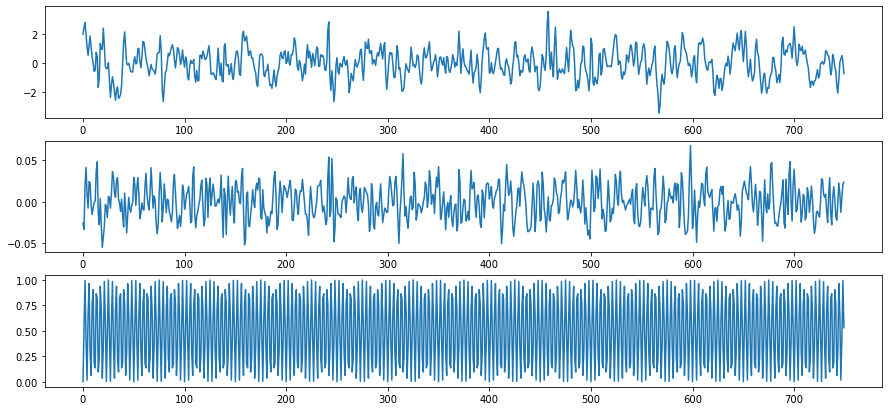

In [183]:
fig, ax = plt.subplots(nrows = 3, ncols = 1)

fig.set_size_inches(15, 7)

k = 35

ax[0].plot(range(len(X[0])), X[0])
ax[1].plot(range(len(X[0])), X_inv_map[0])
ax[2].plot(range(len(stimulus_matrix[k])), stimulus_matrix[k])

In [ ]:
from sklearn.cross_decomposition import CCA

def saveSeparatedFiles_CCA():
    cca = CCA(n_components=64)
    files = [file for file in os.listdir(Project.tsinghua_raw_dir / 'beta') if "mat" in file]
    for s in range(len(files)):
        path  = Project.tsinghua_raw_dir / 'beta' / files[s]
        data, subject_info = getData(path)
        frequency = subject_info.getFrequencies()
        phase = subject_info.getPhases()
        for b in range(4):
            for t in range(40):
                X = data[:, :, b, t].T
                signal_length = X.shape[1]
                stimulus_matrix = np.concatenate(np.array([stimulus(f, phi, signal_length) for f, phi in zip(frequency, phase)]))
                cca.fit(X.T, stimulus_matrix.T)
                X_c, _ = cca.transform(X.T, stimulus_matrix.T)
                
                output_directory = Project.tsinghua_raw_dir / 'beta' / 'separated' / str()
                np.savetxt(Project.tsinghua_raw_dir / 'beta' / 'separated' / str(t+1) / "S{}_{}.csv".format(s+1, b+1), X_c)

***
### Testing Datasets Classes

In [44]:
from Scripts.data.BETADataset import BETADataset

In [45]:
dataset = BETADataset(Project, list(range(1, 5 + 1)), list(range(1, 60 + 1)))

In [47]:
sample, target = next(iter(dataset))

In [48]:
import matplotlib.pyplot as plt